# CNN Algorithm on Fingers Ditection Dataset

<b> Load Dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [11]:
# Data loading 

# read train 
train = pd.read_csv(r"C:\Users\santhosh\Downloads\sign_mnist_train.csv\sign_mnist_train.csv")
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
# read test 
test= pd.read_csv(r"C:\Users\santhosh\Downloads\sign_mnist_test.csv\sign_mnist_test.csv")
print(test.shape)
test.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [20]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [22]:
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


<b> Data Clean

In [47]:
train.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [44]:
train.duplicated().sum()

0

In [42]:
test.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [45]:
test.duplicated().sum()

0

<b> Exploratory Data Analysis

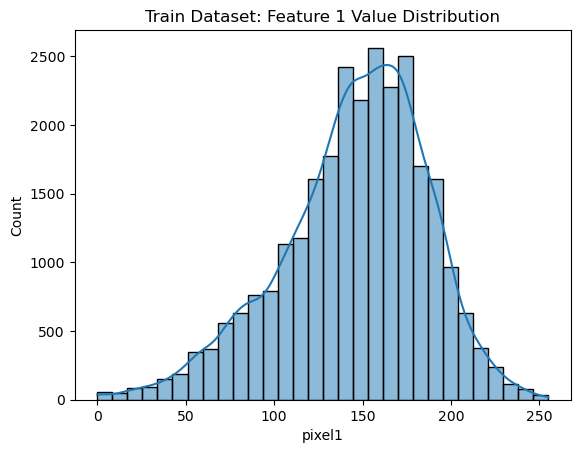

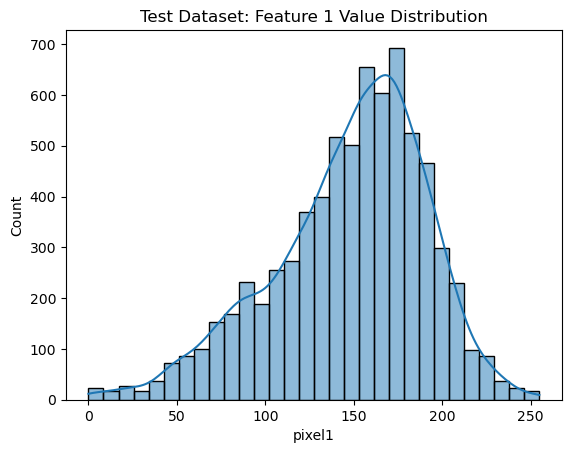

In [26]:
# Distribution of a specific feature (e.g., 'feature_1') in train dataset
sns.histplot(train['pixel1'], bins=30, kde=True)
plt.title('Train Dataset: Feature 1 Value Distribution')
plt.show()

# Distribution of a specific feature (e.g., 'feature_1') in test dataset
sns.histplot(test['pixel1'], bins=30, kde=True)
plt.title('Test Dataset: Feature 1 Value Distribution')
plt.show()

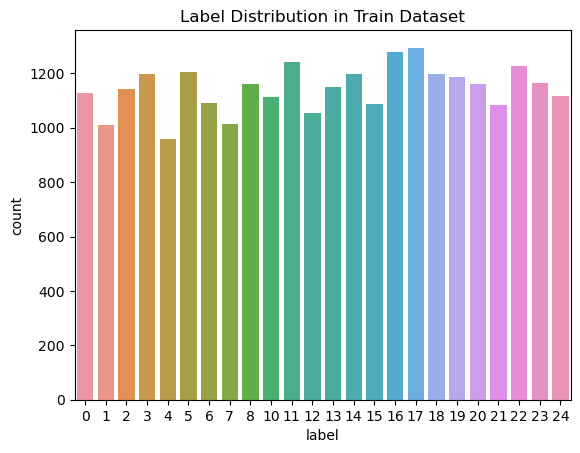

In [28]:
# Count plot for labels in the train dataset (assuming 'label' column exists)
sns.countplot(x='label', data=train)
plt.title('Label Distribution in Train Dataset')
plt.show()


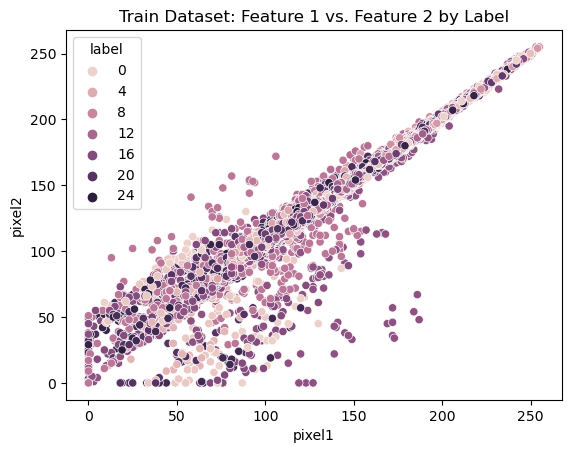

In [30]:
# Scatter plot between two specific features (e.g., 'feature_1' and 'feature_2') in train dataset
sns.scatterplot(x='pixel1', y='pixel2', hue='label', data=train)
plt.title('Train Dataset: Feature 1 vs. Feature 2 by Label')
plt.show()


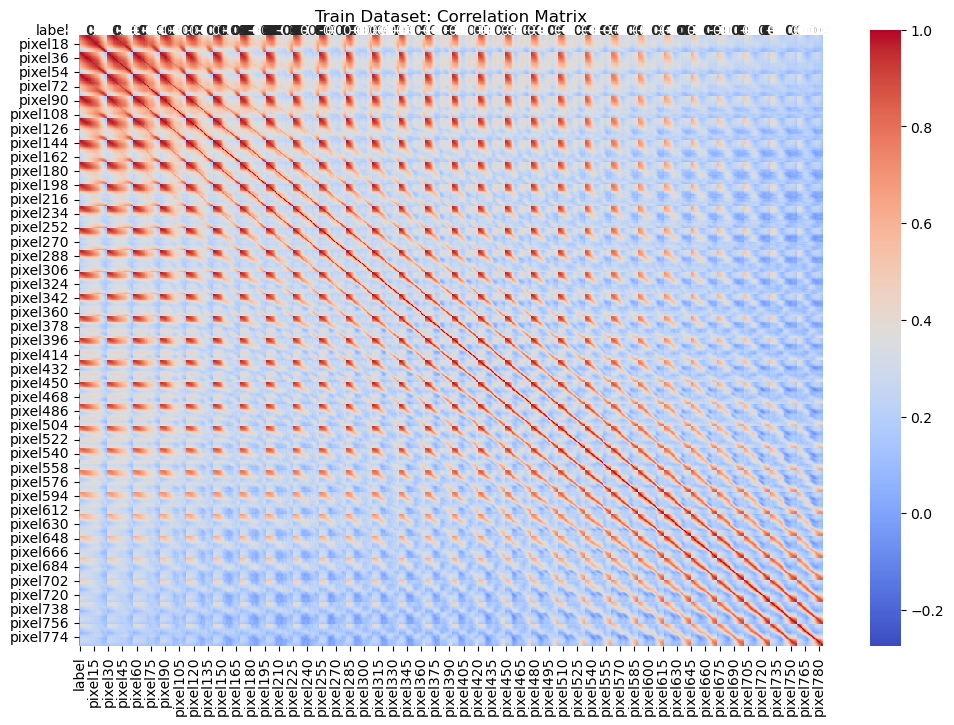

In [33]:
# Correlation matrix for train dataset
train_correlation_matrix = train.corr()

# Plot the heatmap for train dataset
plt.figure(figsize=(12, 8))
sns.heatmap(train_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Train Dataset: Correlation Matrix')
plt.show()


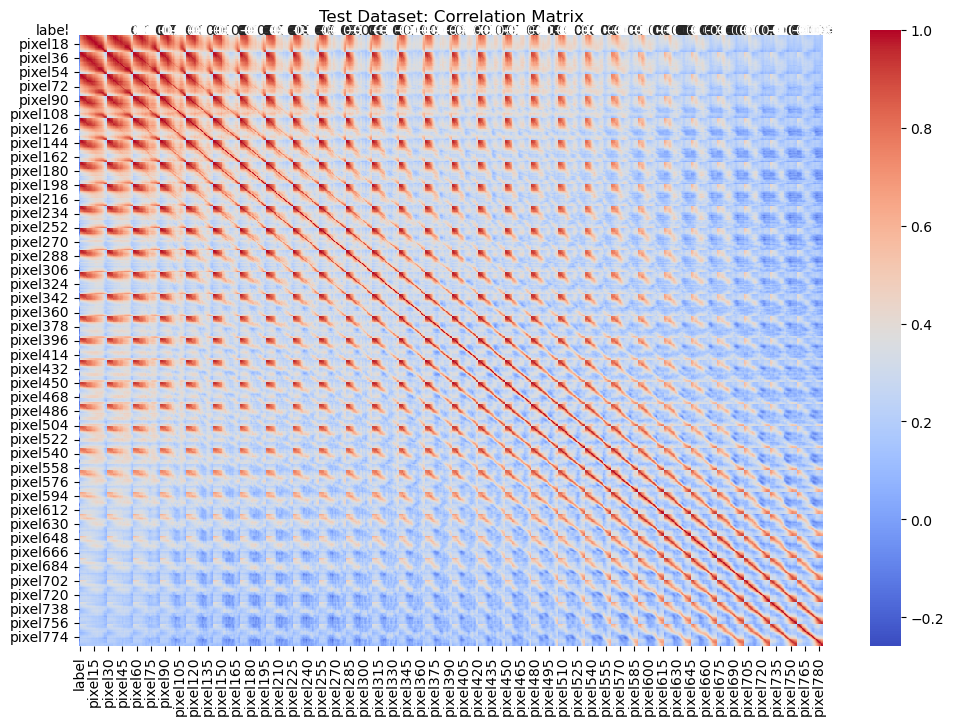

In [32]:
# Correlation matrix for test dataset
test_correlation_matrix = test.corr()

# Plot the heatmap for test dataset
plt.figure(figsize=(12, 8))
sns.heatmap(test_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Test Dataset: Correlation Matrix')
plt.show()


In [4]:
Y_train = train["label"]
Y_test = test["label"]

X_train = train.drop(labels = ["label"],axis = 1)
X_test = train.drop(labels = ["label"],axis = 1)

del train['label']
del test['label']

In [5]:
X_train.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [6]:
Y_train.head(5)

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

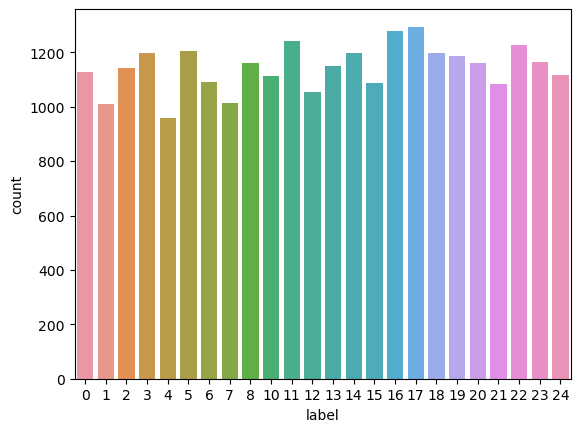

In [7]:
sns.countplot(x = Y_train)

Y_train.value_counts()

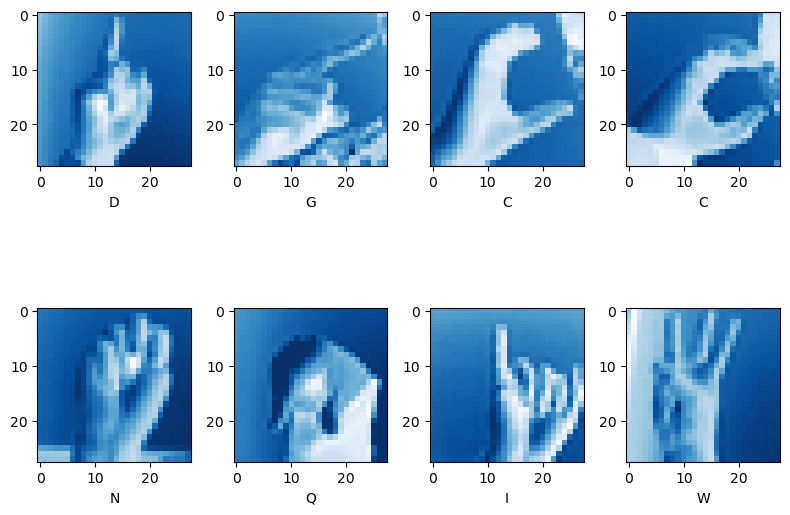

In [12]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = X_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(Y_train[k] + 65))
        ax[i,j].imshow(img,cmap='Blues')
        k += 1
    plt.tight_layout()

<b> Normalization

In [13]:
# Normalize the data
#We perform a grayscale normalization to reduce the effect of illumination's differences.
#If we perform normalization, CNN works faster.
# 255 is thed fixed value og gray scale
X_train = X_train / 255.0
X_test = test / 255.0

In [14]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# shape is column is 784 square is 25 * 25 (h=25, w = 25, csnal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [15]:
# label encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

<b> Train-Test Split

In [16]:
# Split the train and the validation set for the fitting (10% test, 90% train)
from sklearn.model_selection import train_test_split
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=42)

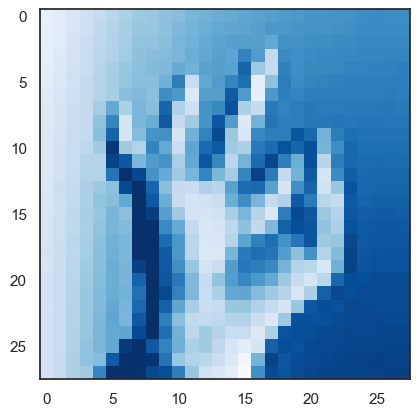

In [41]:
# Example - 
plt.imshow(X_train[45][:,:,0], cmap="Blues")

In [22]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

<b> Model Build

In [23]:
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

#hidden layer 1
model.add(Conv2D(filters = 75, kernel_size = (3,3),padding = 'Same', # convolation 2D
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides = 2 , padding = 'same')) # maxpool
model.add(Dropout(0.25)) # Dropout

#hidden layer 2
model.add(Conv2D(filters=50, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2 , padding = 'same'))
model.add(Dropout(0.25)) # dropout

#hidden layer 3
model.add(Conv2D(filters=25, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.25)) # dropout

#fully connected
model.add(Flatten()) #flattening
model.add(Dense(512, activation = "relu")) #dense
model.add(Dropout(0.5)) # dropout
model.add(Dense(24, activation = "softmax")) #softmax

In [24]:
# Defining Optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

<b> Model complile

In [25]:
# Compiling the Model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [26]:
epochs = 25
batch_size = 200

In [27]:
# data augmentation to prevent overfitting (accuracy 0.99286) simply the images are rotated

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.5, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

<b> Model Training

In [28]:
# Fit the model

history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.0522 - loss: 3.1649 - val_accuracy: 0.2593 - val_loss: 2.5884
Epoch 2/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1750 - loss: 2.8518 - val_accuracy: 0.2646 - val_loss: 2.5620
Epoch 3/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.2131 - loss: 2.5981 - val_accuracy: 0.6120 - val_loss: 1.4371
Epoch 4/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3200 - loss: 2.0626 - val_accuracy: 0.6176 - val_loss: 1.4101
Epoch 5/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.3705 - loss: 1.9709 - val_accuracy: 0.7752 - val_loss: 0.8918
Epoch 6/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4800 - loss: 1.6931 - val_accuracy: 0.7774 - val_loss: 0.8930
Epoch 7/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.4674 - loss: 1.6338 - val_accuracy: 0.8342 - val_loss: 0.6369
Epoch 8/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4800 - loss: 1.4880 - val

<b> Model Evalution

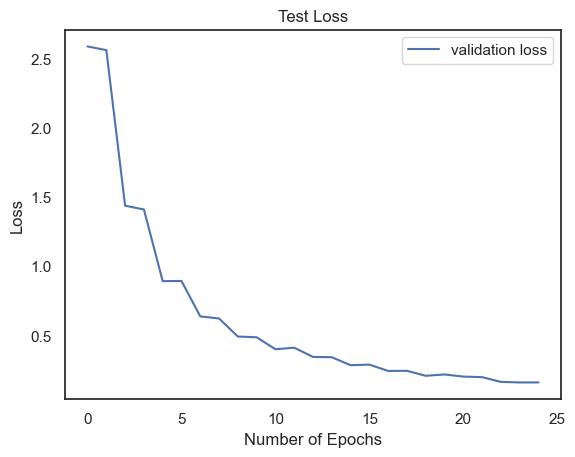

In [33]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

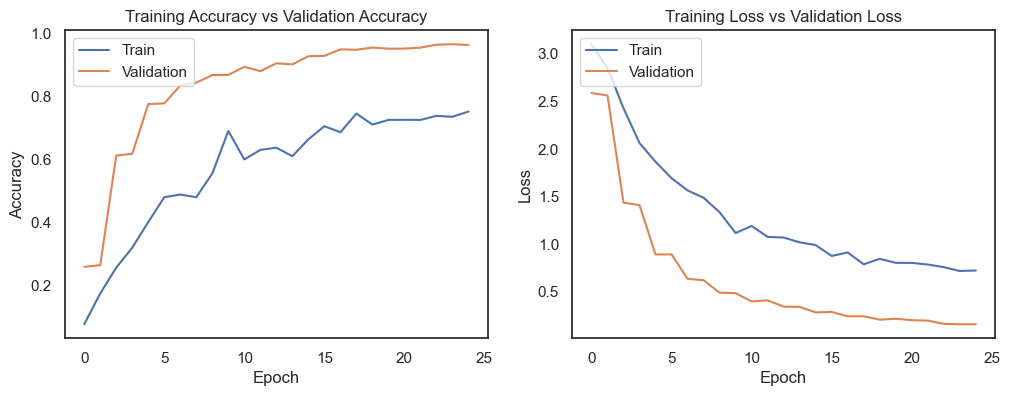

In [34]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

<b> Confusion Matrix

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


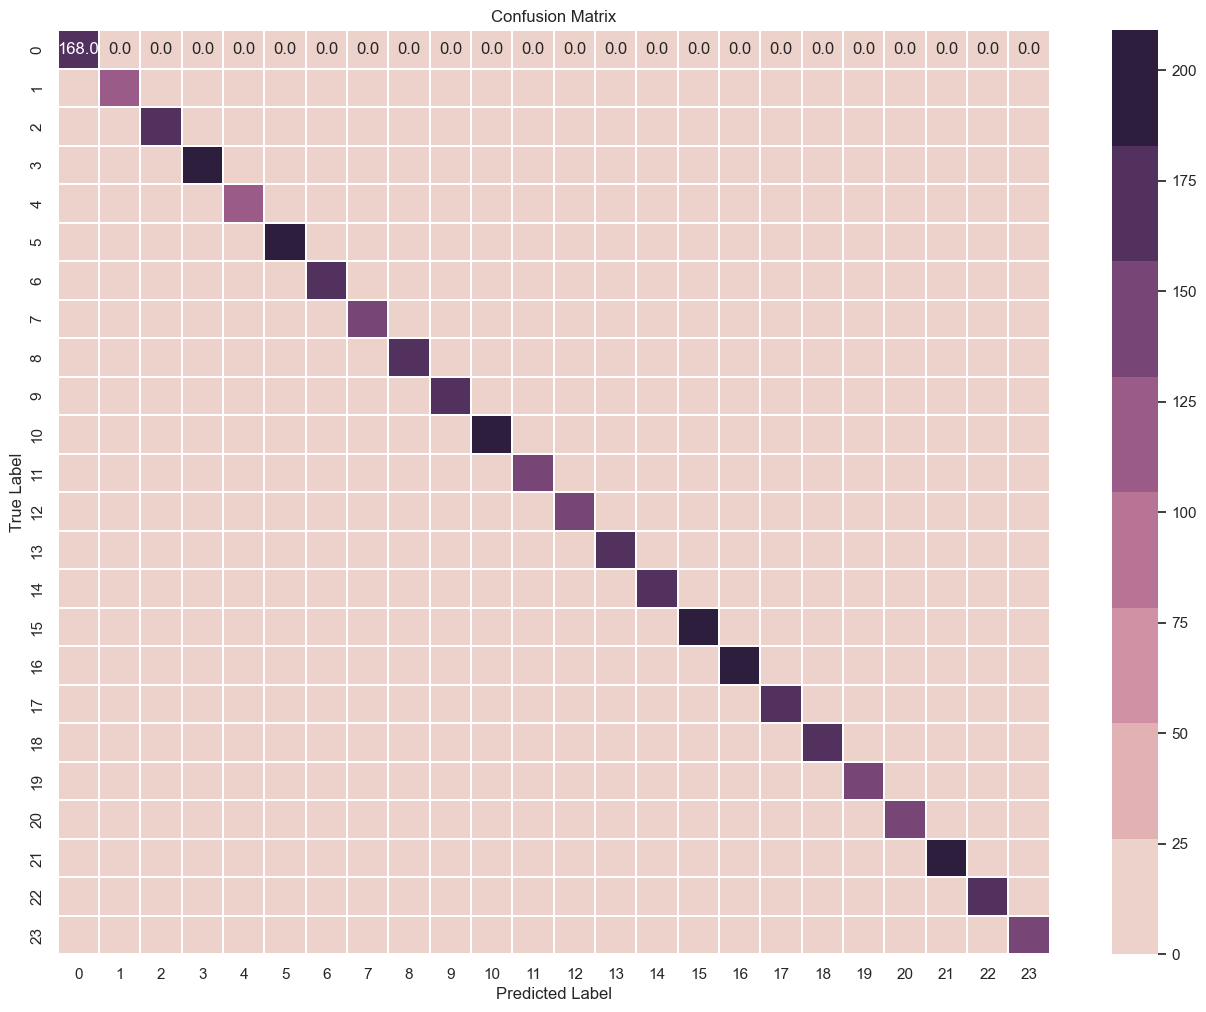

In [35]:
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
f,ax = plt.subplots(figsize=(16, 12))

sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap=sns.cubehelix_palette(8),fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<b> Error Prediction

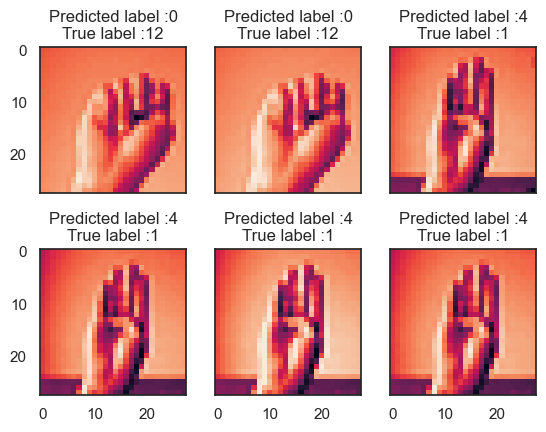

In [36]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)


most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

<b> Predicted values

In [38]:
results = model.predict(X_test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [40]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datgen2.csv",index=False)
submission

,ImageId,Label
0,1,6.0
1,2,5.0
2,3,9.0
3,4,0.0
4,5,16.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN
